# Description
<hr>

- **The goal to build transformer encoder from the scratch is to customize BERT. Original BERT is too large.**

In [1]:
import tensorflow as tf
from encoders.transformer_encoder import *
import matplotlib.pyplot as plt

## Positional encoding

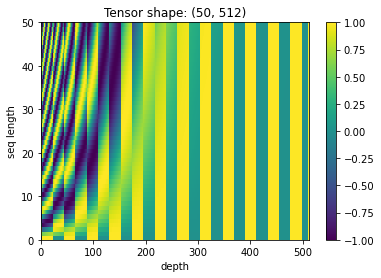

In [2]:
pos_enc = positional_encoding(seq_len=50, embedding_dim=512)
plt.pcolormesh(pos_enc[0])
plt.xlabel('depth')
plt.ylabel('seq length')
plt.title(f'Tensor shape: {pos_enc.shape[1:]}')
plt.colorbar()
plt.show()

## How to use the encoder?

#### Build encoder

In [3]:
MAX_LEN = 80
trns_enc = EncoderModel(vocab_size=3000, embedding_dim=256, max_len=MAX_LEN, num_heads=4, num_layers=3, ffl_units=256)

#### Build dataset samples

In [4]:
BATCH_SIZE = 64
seq = tf.random.uniform((BATCH_SIZE, MAX_LEN), minval=1, maxval=3000, dtype=tf.int32)
output, attn_weights = trns_enc(seq)
print(seq.shape, output.shape, attn_weights.shape)

(64, 80) (64, 80, 256) (64, 4, 80, 80)


#### Encoder details

In [5]:
trns_enc.summary()

Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  768000    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
encoder_layer (EncoderLayer) multiple                  329984    
_________________________________________________________________
encoder_layer_1 (EncoderLaye multiple                  329984    
_________________________________________________________________
encoder_layer_2 (EncoderLaye multiple                  329984    
Total params: 1,757,952
Trainable params: 1,757,952
Non-trainable params: 0
_________________________________________________________________


In [6]:
print(f'There are {len(trns_enc.enc_layers)} encoding layers:')
for layer in trns_enc.enc_layers:
    print(layer)

There are 3 encoding layers:


#### For attention weights visualization

In [7]:
attn_weights.shape

TensorShape([64, 4, 80, 80])

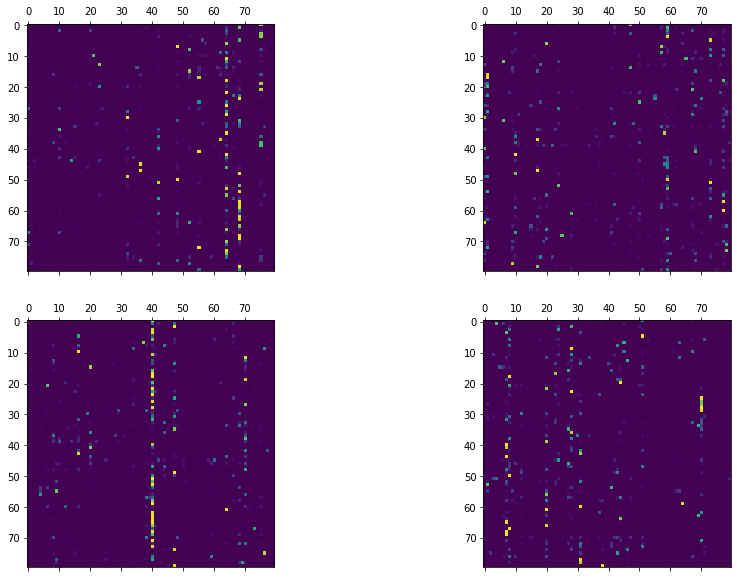

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax1.matshow(attn_weights[0, 0, :, :], cmap='viridis')
ax2.matshow(attn_weights[0, 1, :, :], cmap='viridis')
ax3.matshow(attn_weights[0, 2, :, :], cmap='viridis')
ax4.matshow(attn_weights[0, 3, :, :], cmap='viridis')
plt.show()